# Проект 2. Разведывательный анализ данных.


## Описание задачи.

Используя сведения об учениках школы и отследив влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, создать модель, которая будет предсказывать результаты госэкзамена по математике для каждого ученика школы. 

## Описание датасета
Переменные, которые содержит датасет:

*в описании задачи отсутствуют сведения о содержании имеющегося в Датасете столбца "studytime, granular" (столбец 21), добавлено в описание.

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

### Для выполнения задачи необходимо:

1. Провести первичную обработку данных;
2. Посмотреть на распределение признака для числовых переменных, устранить выбросы (при необходимости);
3. Оценить количество уникальных значений для номинативных переменных;
4. По необходимости преобразовать данные;
5. Провести корреляционный анализ количественных переменных;
6. Ототбрать не коррелирующие переменные;
7. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину;
8. Сформулировать выводы относительно качества данных и тех переменных, которые не будут использоваться в дальнейшем построении модели.

## 1.Проведем первичную обработку данных.

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50)

Загрузим и прочитаем исходный файл.

In [2]:
student_details = pd.read_csv('stud_math.xls')
student_details.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
student_details.shape 

(395, 30)

Датасет состоит из 30 столбцов (columns) и 395 строк (rows).

Извлечем информацию о том, какие данные хранятся в файле и какие типы данных у столбцов.

In [4]:
student_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Датасет представляет собой сведения по 30 параметрам (признакам) в отношении 395 учеников.

Проверим, есть ли в Датасете пропущенные значения.

In [5]:
student_details.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

В Датасете имеются пропущенные значения (во всех столбцах, кроме 'school', 'sex', 'age'). 

Как видно из полученных данных, в Датасете имеется столбец, упоминание о котором отсутствует в описании Датасета - 'studytime, granular'.

Выведем количество уникальных значений по столбцам.

In [6]:
student_details.nunique()

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

### Выводы:
- в Датесете 13 столбцов содержат числовые значения, 17 столбцов - строковые значения; 
- из 30 столбцов, в в 13 столбцах - бинарные значения;
- при этом, из числовых столбцов, только 3 столбца отражают количественные значения - 'age', 'absences' и 'score'.

Выведем на экран статистические характеристики числовых столбцов.

In [7]:
student_details.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [8]:
student_details.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Для удобства переименуем столбцы, названия которых начинаются с большой буквы и столбец, название которого состоит из 2 слов.

In [9]:
student_details.rename(columns = {'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gran'}, inplace=True)

In [10]:
student_details.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'studytime_gran', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [11]:
display(student_details.head(10))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [12]:
for column in student_details.columns:
    print('\n---count values for {} column---'.format(column), 
          student_details[column].value_counts(dropna=False), sep='\n')


---count values for school column---
GP    349
MS     46
Name: school, dtype: int64

---count values for sex column---
F    208
M    187
Name: sex, dtype: int64

---count values for age column---
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

---count values for address column---
U      295
R       83
NaN     17
Name: address, dtype: int64

---count values for famsize column---
GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

---count values for p_status column---
T      314
NaN     45
A       36
Name: p_status, dtype: int64

---count values for m_edu column---
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: m_edu, dtype: int64

---count values for f_edu column---
2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: f_edu, dtype: int64

---count values for m_job column---
other       133
services     98
at_home      58
teacher      55
health       32
NaN 

# Проанализируем количественные признаки 'age', 'absences', 'score'.


## Признак 'age' (количественный)

In [13]:
pd.DataFrame(student_details.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [14]:
student_details.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


Посмотрим на числовое распределение признака 'age' — возраст ученика (от 15 до 22).

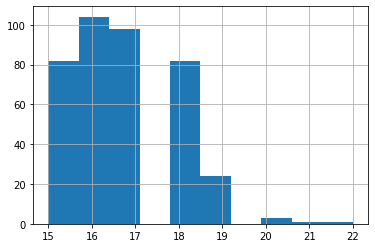

In [15]:
student_details.age.hist()

Проверим на наличие выбросов.

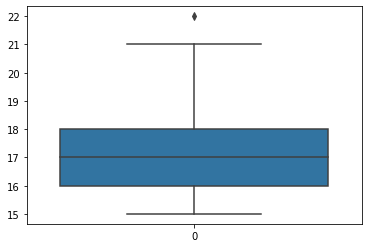

In [16]:
sns.boxplot(data = student_details.age)

Рассчитаем значения границ выбросов.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


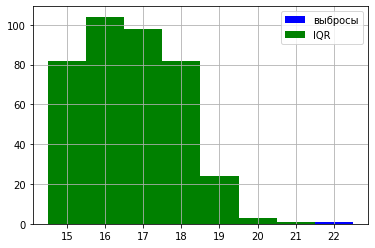

In [17]:
IQR = student_details.age.quantile(0.75) - student_details.age.quantile(0.25)
perc25 = student_details.age.quantile(0.25)
perc75 = student_details.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


student_details.age.loc[student_details.age <= 22].hist(bins = 8, 
                                  range = (14.5, 22.5), 
                                  color = 'blue',
                                  label = 'выбросы')

student_details.age.loc[student_details.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8, 
                                                                        range = (14.5, 22.5),
                                                                        color = 'green',
                                                                        label = 'IQR')

plt.legend()

Таким образом, проанализировав полученные результаты, мы можем считать выбросами значения 'age' больше 21. Учитывая, что учеников в возрасте 20 лет и старше 20 лет, всего 5, можно включить всех этих учеников в группу учеников возвраста 20 лет. 

In [18]:
student_details['age'][student_details['age'] >= 20] = 20

C:\Users\mznay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Чтобы для наглядности  выводить отдельный столбец и информацию о выводимом столбце, напишем функицю columns_info.

In [19]:
def columns_info(col):

    display(pd.DataFrame(student_details[col].value_counts().head(10)))
    student_details.loc[:, [col]].info()

In [20]:
columns_info('age')

,age
16,104
17,98
18,82
15,82
19,24
20,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [21]:
student_details.age.describe()

count    395.000000
mean      16.688608
std        1.251090
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       20.000000
Name: age, dtype: float64

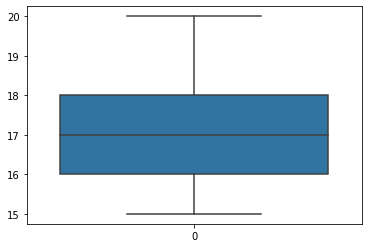

In [22]:
sns.boxplot(data = student_details.age)

Видим, что в результате произведенных манипуляций выбросов значения 'age' больше нет.

## Признак 'absences' (количественный)

In [23]:
pd.DataFrame(student_details.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


In [24]:
student_details.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Посмотрим на числовое распределение признака 'absences' (количество пропущенных занятий)/

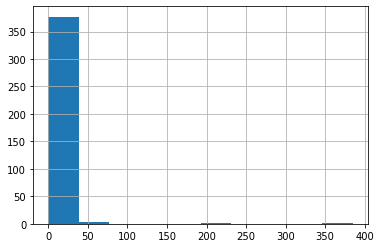

In [25]:
student_details.absences.hist()

Проверим на наличие выбросов.

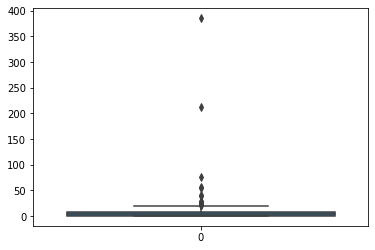

In [26]:
sns.boxplot(data = student_details.absences)

Рассчитаем значения границ выбросов.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


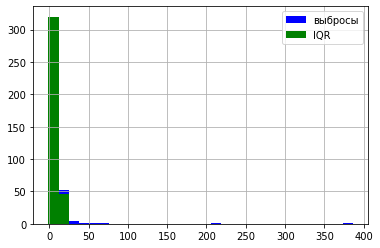

In [27]:
median = student_details.absences.median()
IQR = student_details.absences.quantile(0.75) - student_details.absences.quantile(0.25)
perc25 = student_details.absences.quantile(0.25)
perc75 = student_details.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


student_details.absences.loc[student_details.absences <= 385].hist(bins=30,
                                             range=(-1, 386),
                                             color='blue',
                                             label='выбросы')

student_details.absences.loc[student_details.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=30,
                                                                                  range=(-1,
                                                                                         386),
                                                                                  color='green',
                                                                                  label='IQR')

plt.legend()

Посмотрим на описательную статистику значений признака 'absences'.

In [28]:
student_details.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Избавимся от выбросов.

In [29]:
student_details.loc[student_details['absences'] > 20.0, 'absences'] = np.nan

In [30]:
columns_info('absences')

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  366 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заполним пропуски медианным занчением.

In [31]:
student_details.loc[pd.isnull(student_details['absences']), 'absences'] = student_details['absences'].median()

In [32]:
columns_info('absences')

,absences
0.0,111
4.0,82
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


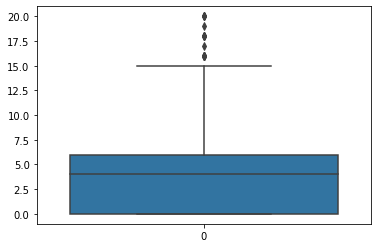

In [33]:
sns.boxplot(data = student_details.absences)

### Выводы: 
большинство значений 'absences' находится в диапазоне от 0 до 7. Выбросы оставим и удалять не будем.

## Признак 'score' (количественный)

In [34]:
pd.DataFrame(student_details.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [35]:
student_details.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


### Посмотрим на числовое распределение признака 'score' (баллы по госэкзамену по математике) и границы выбросов

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


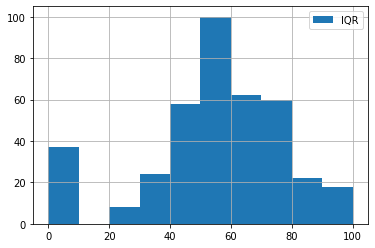

In [36]:
median = student_details.score.median()
IQR = student_details.score.quantile(0.75) - student_details.score.quantile(0.25)
perc25 = student_details.score.quantile(0.25)
perc75 = student_details.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


students_score_plot = student_details.score[student_details.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_score_plot.hist(bins = 10,label = 'IQR')
plt.legend()

Посмотрим на описательную статистику значений признака 'score'.

In [37]:
student_details.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [38]:
columns_info('score')

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


#### Найдем процентное соотношение студентов с оценкой 0 по отношению к другим студентам.

In [39]:
print('Учеников с оценкой ноль - {:.2%}'
      .format(len(student_details[student_details.score == 0].index)/len(student_details.index)))

Учеников с оценкой ноль - 9.37%


In [40]:
student_details.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# Проанализируем остальные признаки.

## Признак 'school'

In [41]:
columns_info('school')

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Результат: 
в Датасете содержаться сведения об учениках из 2 школ - GP и MC, что указывает на то, что 'school' - бинарный признак.
Пропущенных значений в столбце 'school' нет.

## Признак 'sex'

In [42]:
columns_info('sex')

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Результат:

в Датасете содержаться сведения об учениках мужского и женского пола (ожидаемо), что указывает на то, что 'sex' - бинарный признак. Пропущенных значений в столбце 'sex' нет.

## Признак 'address'

In [43]:
columns_info('address')

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [44]:
print('Учеников без указания адреса - {:.2%}'
      .format(len(student_details[student_details.address.isna()].index)/len(student_details.index)))

Учеников без указания адреса - 4.30%


#### Результат:

В Датасете содержаться сведения об 295 учениках живущих в городской местности и 83 учениках, которые живут загородом. Признак 'address' является бинарным. В столбце 'address' 17 пропущенных значений, что составляет 4.30% от всех значений данного признака в Датасете.

Заполним пустые строки значением самым популярным значением 'U' и выведем число строк с пропущенными значениями признака 'address'.

In [45]:
student_details.address = student_details.address.fillna('U')
student_details.address.isna().sum()

0

## Признак 'famsize'

In [46]:
columns_info('famsize')

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [47]:
print('Учеников без указания размера семьи - {:.2%}'
      .format(len(student_details[student_details.famsize.isna()].index)/len(student_details.index)))

Учеников без указания размера семьи - 6.84%


#### Результат:
В Датасете содержаться сведения об 261 учениках из семей с составом семье менее 3 человек и 107 учениках, состав семьи из которой они, больше 3 человек. В данном случае признак 'famsize' является бинарным. В столбце 'famsize' 27 пропущенных значений, что составляет 6.84% от общего числа учеников. Пропущенные значения запролним самым популярным значением 'GT3'.


In [48]:
student_details.famsize = student_details.famsize.fillna('GT3')
student_details.famsize.isna().sum()

0

## Признак 'p_status'

In [49]:
columns_info('p_status')

,p_status
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [50]:
print('Учеников без указания признака о совместном проживании родителей - {:.2%}'
      .format(len(student_details[student_details.p_status.isna()].index)/len(student_details.index)))

Учеников без указания признака о совместном проживании родителей - 11.39%


#### Результат:
Большая часть учеников проживают в полных семьях, где родители проживают совместно. 
В данном случае признак 'p_status' является бинарным. В столбце 'p_status' 45 пропущенных значений, что составляет 11.39% от общего числа учеников. Пропущенные значения заполним самым популярным значением 'T'.

In [51]:
student_details.p_status = student_details.p_status.fillna('T')
student_details.p_status.isna().sum()

0

## Признак 'm_edu'

In [52]:
columns_info('m_edu')

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [53]:
print('Учеников без указания признака об образовании матери - {:.2%}'
      .format(len(student_details[student_details.m_edu.isna()].index)/len(student_details.index)))

Учеников без указания признака об образовании матери - 0.76%


#### Результат:
Значение признака 'm_edu' несмотря на то, что представлено числовыми значениями, является категориальным. В столбце 'm_edu' 3 пропущенных значения, что составляет 0.76% от общего числа учеников. Пропущенные значения заполним медианным значением.

In [54]:
student_details.m_edu = student_details.m_edu.fillna(student_details.m_edu.median())
student_details.m_edu.isna().sum()

0

## Признак 'f_edu'

In [55]:
columns_info('f_edu')

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [56]:
print('Учеников без указания признака об образовании отца - {:.2%}'
      .format(len(student_details[student_details.f_edu.isna()].index)/len(student_details.index)))

Учеников без указания признака об образовании отца - 6.08%


#### Результат:
Значение признака 'f_edu' несмотря на то, что представлено числовыми значениями, является категориальным. В столбце 'f_edu' 24 пропущенных значения, что составляет 6.08% от общего числа учеников. Пропущенные значения заполним медианным значением. Кроме того, заменим значение 40 (очевидно, что это ошибка заполнения) на значение 4.

In [57]:
student_details.loc[student_details.f_edu == 40.0, 'f_edu'] = 4.0

In [58]:
student_details.f_edu = student_details.f_edu.fillna(student_details.f_edu.median())
student_details.f_edu.isna().sum()

0

## Признак 'm_job'

In [59]:
columns_info('m_job')

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [60]:
print('Учеников без указания признака о работе матери - {:.2%}'
      .format(len(student_details[student_details.m_job.isna()].index)/len(student_details.index)))

Учеников без указания признака о работе матери - 4.81%


#### Результат:
Признак 'm_job' является категориальным, принимает 5 уникальных значений. В столбце 'm_job' 19 пропущенных значения, что составляет 4.81% от общего числа учеников. Заполним пустые строки самым популярным значением 'other'.

In [61]:
student_details.m_job = student_details.m_job.fillna('other')
student_details.m_job.isna().sum()

0

## Признак 'f_job'

In [62]:
columns_info('f_job')

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [63]:
print('Учеников без указания признака о работе отца - {:.2%}'
      .format(len(student_details[student_details.f_job.isna()].index)/len(student_details.index)))

Учеников без указания признака о работе отца - 9.11%


#### Результат:
Признак 'f_job' является категориальным, принимает 5 уникальных значений. В столбце 'f_job' 36 пропущенных значениq, что составляет 9.11% от общего числа учеников. Пропущенные значения заполним самым популярным значением 'other'.

In [64]:
student_details.f_job = student_details.f_job.fillna('other')
student_details.f_job.isna().sum()

0


## Признак 'reason'

In [65]:
columns_info('reason')

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [66]:
print('Учеников без указания признака о причине - {:.2%}'
      .format(len(student_details[student_details.reason.isna()].index)/len(student_details.index)))

Учеников без указания признака о причине - 4.30%


#### Результат:
Признак 'reason' является категориальным, принимает 4 уникальных значения. В столбце 'reason' 17 пропущенных значений, что составляет 4.30% от общего числа учеников. Пропущенные значения заполним самым популярным значением 'course'.

In [67]:
student_details.reason = student_details.reason.fillna('course')
student_details.reason.isna().sum()

0

## Признак 'guardian'

In [68]:
columns_info('guardian')

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [69]:
print('Учеников без указания признака об опекуне - {:.2%}'
      .format(len(student_details[student_details.guardian.isna()].index)/len(student_details.index)))

Учеников без указания признака об опекуне - 7.85%


#### Результат:
Признак 'guardian' является категориальным, принимает 3 уникальных значения. В столбце 'guardian' 31 пропущенное значение, что составляет 7.85% от общего числа учеников. Пропущенные значения заполним самым популярным значением 'mother'.

In [70]:
student_details.guardian = student_details.guardian.fillna('mother')
student_details.guardian.isna().sum()

0

## Признак 'traveltime' 

In [71]:
columns_info('traveltime')

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [72]:
print('Учеников без указания признака о времени пути до школы - {:.2%}'
      .format(len(student_details[student_details.traveltime.isna()].index)/len(student_details.index)))

Учеников без указания признака о времени пути до школы - 7.09%


#### Результат:
Признак 'traveltime'  несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'traveltime' 28 пропущенных значений, что составляет 7.09% от общего числа учеников. Пропущенные значения заполним медианным значением. 

In [73]:
student_details.traveltime = student_details.traveltime.fillna(student_details.traveltime.median())
student_details.traveltime.isna().sum()

0

## Признак 'studytime'

In [74]:
columns_info('studytime')

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [75]:
print('Учеников без указания признака о времени на учебу помимо школы - {:.2%}'
      .format(len(student_details[student_details.studytime.isna()].index)/len(student_details.index)))

Учеников без указания признака о времени на учебу помимо школы - 1.77%


#### Результат:
Признак 'studytime' несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'studytime' 7 пропущенных значений, что составляет 1.77% от общего числа учеников. Пропущенные значения заполним медианным значением.

In [76]:
student_details.studytime = student_details.studytime.fillna(student_details.studytime.median())
student_details.studytime.isna().sum()

0

## Признак 'studytime_gran'

In [77]:
columns_info('studytime_gran')

,studytime_gran
-6.0,194
-3.0,103
-9.0,64
-12.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studytime_gran  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [78]:
print('Учеников без указания признака studytime_gran - {:.2%}'
      .format(len(student_details[student_details.studytime_gran.isna()].index)/len(student_details.index)))

Учеников без указания признака studytime_gran - 1.77%


#### Результат:
Признак 'studytime_gran' несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'studytime_gran' 7 пропущенных значений, что составляет 1.77% от общего числа учеников. Пропущенные значения заполним медианным значением.

In [79]:
student_details.studytime_gran = student_details.studytime_gran.fillna(student_details.studytime_gran.median())
student_details.studytime_gran.isna().sum()

0

Кроме того, видим, что признак 'studytime_gran' взаимосвязан с признаком 'studytime' (значения признака 'studytime_gran' образован умножением на -3 значений признака 'studytime').

## Признак 'failures'

In [80]:
columns_info('failures')

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [81]:
print('Учеников без указания признака о количестве внеучебных неудач - {:.2%}'
      .format(len(student_details[student_details.failures.isna()].index)/len(student_details.index)))

Учеников без указания признака о количестве внеучебных неудач - 5.57%


#### Результат:
Признак 'failures' несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'studytime' 7 пропущенных значений, что составляет 5.57% от общего числа учеников. Пропущенные значения заполним медианным значением.

In [82]:
student_details.failures = student_details.failures.fillna(student_details.failures.median())
student_details.failures.isna().sum()

0

## Признак 'schoolsup'

In [83]:
columns_info('schoolsup')

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [84]:
print('Учеников без указания признака о наличии дополнительной образовательной поддержке - {:.2%}'
      .format(len(student_details[student_details.schoolsup.isna()].index)/len(student_details.index)))

Учеников без указания признака о наличии дополнительной образовательной поддержке - 2.28%


#### Результат:

Признак 'schoolsup' является категориальным. Значения признака 'schoolsup' представлены значениями 'yes' и 'no', признак 'schoolsup' является бинарным. В столбце 'schoolsup' 9 пропущенных значений, что составляет 2.28% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'no' и выведем число строк с пропущенными значениями признака 'schoolsup'.

In [85]:
student_details.schoolsup = student_details.schoolsup.fillna('no')
student_details.schoolsup.isna().sum()

0

## Признак 'famsup'

In [86]:
columns_info('famsup')

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [87]:
print('Учеников без указания признака о семейной образовательной поддержке - {:.2%}'
      .format(len(student_details[student_details.famsup.isna()].index)/len(student_details.index)))

Учеников без указания признака о семейной образовательной поддержке - 9.87%


Результат:
Признак 'famsup' является категориальным. Значения признака 'famsup' представлены значениями 'yes' и 'no', признак 'fumsup' является бинарным. В столбце 'famsup' 9 пропущенных значений, что составляет 2.28% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'yes' и выведем число строк с пропущенными значениями признака 'famsup'.

In [88]:
student_details.famsup = student_details.famsup.fillna('yes')
student_details.famsup.isna().sum()

0

## Признак 'paid'

In [89]:
columns_info('paid')

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [90]:
print('Учеников без указания признака о прохождении дополнительных платных занятий по математике - {:.2%}'
      .format(len(student_details[student_details.paid.isna()].index)/len(student_details.index)))

Учеников без указания признака о прохождении дополнительных платных занятий по математике - 10.13%


#### Результат: 
Признак 'paid' является категориальным. Значения признака 'paid' представлены значениями 'yes' и 'no', признак 'paid' является бинарным. В столбце 'paid' 40 пропущенных значений, что составляет 10.13% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'no' и выведем число строк с пропущенными значениями признака 'paid'.

In [91]:
student_details.paid = student_details.paid.fillna('no')
student_details.paid.isna().sum()

0

## Признак 'activities'

In [92]:
columns_info('activities')

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [93]:
print('Учеников без указания признака о прохождении дополнительных внеучебных занятий - {:.2%}'
      .format(len(student_details[student_details.activities.isna()].index)/len(student_details.index)))

Учеников без указания признака о прохождении дополнительных внеучебных занятий - 3.54%


#### Результат:
Признак 'activities' является категориальным. Значения признака 'activities' представлены значениями 'yes' и 'no', признак 'activities' является бинарным. В столбце 'activities' 14 пропущенных значений, что составляет 3.54% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'yes' и выведем число строк с пропущенными значениями признака 'activities'.

In [94]:
student_details.activities = student_details.activities.fillna('yes')
student_details.activities.isna().sum()

0

## Признак 'nursery'

In [95]:
columns_info('nursery')

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [96]:
print('Учеников без указания признака о посещении детского сада - {:.2%}'
      .format(len(student_details[student_details.nursery.isna()].index)/len(student_details.index)))

Учеников без указания признака о посещении детского сада - 4.05%


#### Результат:
Признак 'nursery' является категориальным. Значения признака 'nursery' представлены значениями 'yes' и 'no', признак 'nursery' является бинарным. В столбце 'nursery' 16 пропущенных значений, что составляет 4.05% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'yes' и выведем число строк с пропущенными значениями признака 'nursery'.

In [97]:
student_details.nursery = student_details.nursery.fillna('yes')
student_details.nursery.isna().sum()

0

## Признак 'higher'

In [98]:
columns_info('higher')

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [99]:
print('Учеников без указания признака о желании получить высшее образование - {:.2%}'
      .format(len(student_details[student_details.higher.isna()].index)/len(student_details.index)))

Учеников без указания признака о желании получить высшее образование - 5.06%


#### Результат:
Признак 'higher' является категориальным. Значения признака 'higher' представлены значениями 'yes' и 'no', признак 'higher' является бинарным. В столбце 'higher' 20 пропущенных значений, что составляет 5.06% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'yes' и выведем число строк с пропущенными значениями признака 'higher'.

In [100]:
student_details.higher = student_details.higher.fillna('yes')
student_details.higher.isna().sum()

0

## Признак 'internet'

In [101]:
columns_info('internet')

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [102]:
print('Учеников без указания признака о наличии интернета дома - {:.2%}'
      .format(len(student_details[student_details.internet.isna()].index)/len(student_details.index)))

Учеников без указания признака о наличии интернета дома - 8.61%


#### Результат:¶
Признак 'internet' является категориальным. Значения признака 'internet' представлены значениями 'yes' и 'no', признак 'internet' является бинарным. В столбце 'internet' 20 пропущенных значений, что составляет 8.61% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'yes' и выведем число строк с пропущенными значениями признака 'internet'.

In [103]:
student_details.internet = student_details.internet.fillna('yes')
student_details.internet.isna().sum()

0

## Признак 'romantic'

In [104]:
columns_info('romantic')

,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [105]:
print('Учеников без указания признака о наличии романтических отношений - {:.2%}'
      .format(len(student_details[student_details.romantic.isna()].index)/len(student_details.index)))

Учеников без указания признака о наличии романтических отношений - 7.85%


#### Результат:¶
Признак 'romantic' является категориальным. Значения признака 'romantic' представлены значениями 'yes' и 'no', признак 'romantic' является бинарным. В столбце 'romantic' 31 пропущенное значение, что составляет 7.85% от всех значений данного признака в Датасете. Заполним пустые строки значением самым популярным значением 'no' и выведем число строк с пропущенными значениями признака 'romantic'.

In [106]:
student_details.romantic = student_details.romantic.fillna('no')
student_details.romantic.isna().sum()

0

## Признак 'famrel'

In [107]:
columns_info('famrel')

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [108]:
print('Учеников без указания признака о семейных отношениях отношений - {:.2%}'
      .format(len(student_details[student_details.famrel.isna()].index)/len(student_details.index)))

Учеников без указания признака о семейных отношениях отношений - 6.84%


#### Результат:¶
Признак 'famrel' несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'famrel' 27 пропущенных значений, что составляет 6.84% от общего числа учеников. Пропущенные значения заполним медианным значением.
Кроме того, очевидно имеется ошибка, одно из значений признака 'farmel' равно -1, заменим это значение на 1.

In [109]:
student_details.loc[student_details.famrel == -1.0, 'famrel'] = 1.0

In [110]:
student_details.famrel = student_details.famrel.fillna(student_details.famrel.median())
student_details.famrel.isna().sum()

0

## Признак 'freetime'

In [111]:
columns_info('freetime')

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [112]:
print('Учеников без указания признака о свободном времени после школы - {:.2%}'
      .format(len(student_details[student_details.freetime.isna()].index)/len(student_details.index)))

Учеников без указания признака о свободном времени после школы - 2.78%


#### Результат:¶
Признак 'freetime' несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'freetime' 11 пропущенных значений, что составляет 2.78% от общего числа учеников. Пропущенные значения заполним медианным значением. 

In [113]:
student_details.freetime = student_details.freetime.fillna(student_details.freetime.median())
student_details.freetime.isna().sum()

0

## Признак 'goout'

In [114]:
columns_info('goout')

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [115]:
print('Учеников без указания признака о проведении времени с друзьями - {:.2%}'
      .format(len(student_details[student_details.goout.isna()].index)/len(student_details.index)))

Учеников без указания признака о проведении времени с друзьями - 2.03%


#### Результат:
Признак 'goout' несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'goout' 8 пропущенных значений, что составляет 2.03% от общего числа учеников. Пропущенные значения заполним медианным значением.

In [116]:
student_details.goout = student_details.goout.fillna(student_details.goout.median())
student_details.goout.isna().sum()

0

## Признак 'health'

In [117]:
columns_info('health')

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [118]:
print('Учеников без указания признака о текущем состоянии здоровья - {:.2%}'
      .format(len(student_details[student_details.health.isna()].index)/len(student_details.index)))

Учеников без указания признака о текущем состоянии здоровья - 3.80%


#### Результат:¶
Признак 'health' несмотря на то, что представлен числовыми значениями, является категориальным. В столбце 'health' 15 пропущенных значений, что составляет 3.80% от общего числа учеников. Пропущенные значения заполним медианным значением.

In [119]:
student_details.health = student_details.health.fillna(student_details.health.median())
student_details.health.isna().sum()

0

In [120]:
# Проверим, есть ли послке всех проведенных манипуляций пропущенные значения в Датасете 
student_details.isnull().sum()

school            0
sex               0
age               0
address           0
famsize           0
p_status          0
m_edu             0
f_edu             0
m_job             0
f_job             0
reason            0
guardian          0
traveltime        0
studytime         0
failures          0
schoolsup         0
famsup            0
paid              0
activities        0
nursery           0
studytime_gran    0
higher            0
internet          0
romantic          0
famrel            0
freetime          0
goout             0
health            0
absences          0
score             6
dtype: int64

В итоге видим, что кроме как в столбце со значениями признака 'score', пропущенных значений в Датасете больше не имеется.

Признак 'studytime_gran' линейно зависим от признака 'studytime', в связи с этим является возможным удалить столбец, содержащий значения признака 'studytime_gran'.

In [121]:
student_details = student_details.drop(['studytime_gran'], axis = 1)

Оставшиеся значения:

In [122]:
numeric_signs = student_details[['age', 'absences','score']]
binary_signs = student_details[['sex', 'school', 'address', 'famsize', 'p_status','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]
categories_signs = pd.DataFrame(student_details[['m_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures','famrel','freetime', 'goout', 'health']], dtype='object')

In [123]:
numeric_signs

,age,absences,score
0,18,6.0,30.0
1,17,4.0,30.0
2,15,10.0,50.0
3,15,2.0,75.0
4,16,4.0,50.0
...,...,...,...
390,20,4.0,45.0
391,17,3.0,80.0
392,20,3.0,35.0
393,18,0.0,50.0


In [124]:
binary_signs

,sex,school,address,famsize,p_status,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,F,GP,U,GT3,A,yes,no,no,no,yes,yes,yes,no
1,F,GP,U,GT3,T,no,yes,no,no,no,yes,yes,no
2,F,GP,U,LE3,T,yes,no,no,no,yes,yes,yes,no
3,F,GP,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,F,GP,U,GT3,T,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,MS,U,LE3,A,no,yes,yes,no,yes,yes,no,no
391,M,MS,U,LE3,T,no,no,no,no,no,yes,yes,no
392,M,MS,R,GT3,T,no,no,no,no,no,yes,no,no
393,M,MS,R,LE3,T,no,no,no,yes,no,yes,yes,no


In [125]:
categories_signs

,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,health
0,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,3
1,1,1,at_home,other,course,father,1,2,0,5,3,3,3
2,1,1,at_home,other,other,mother,1,2,3,4,3,2,3
3,4,2,health,other,home,mother,1,3,0,3,2,2,5
4,3,3,other,other,home,father,1,2,0,4,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,services,services,course,mother,1,2,2,5,5,4,4
391,3,1,services,services,course,mother,2,1,0,2,4,5,2
392,1,1,other,other,course,mother,1,1,3,5,5,3,3
393,3,2,services,other,course,mother,3,1,0,4,4,1,5


## 2.Корреляционный анализ

Выясним, какие столбцы коррелируют со значениями 'score'. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов: 'age', 'absences', 'score'.

Посмотрим корреляцию числовых значений на графиках.

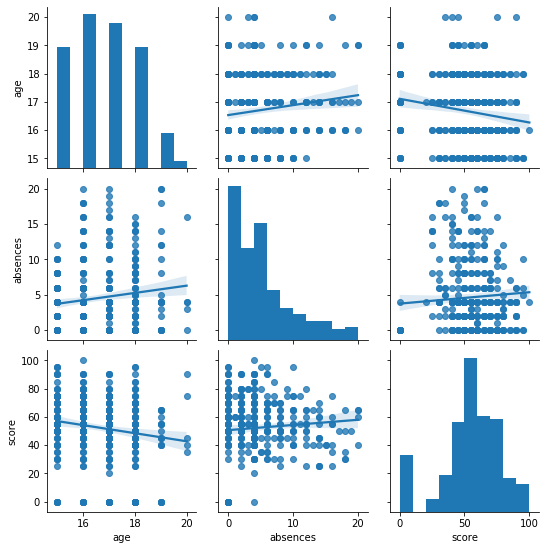

In [126]:
sns.pairplot(numeric_signs, kind = 'reg')

In [127]:
numeric_signs.corr()

,age,absences,score
age,1.000000,0.134833,-0.155164
absences,0.134833,1.000000,0.076994
score,-0.155164,0.076994,1.000000


Полученная визуализация показывает корреляцию с возрастом ('age'), а также некоторую корреляцию со значениями признака 'absences' (данная корреляция достаточно странная, поскольку указывает на то, что оценки выше у тех учеников, кто пропустил больше занятий). 

Визуализируем корреляцию числовых значений, используя значения из строк, в которых значения 'score' не являются нулевыми и посмотрим изменятся ли результаты.

In [128]:
numeric_signs = numeric_signs[numeric_signs['score'] > 0]

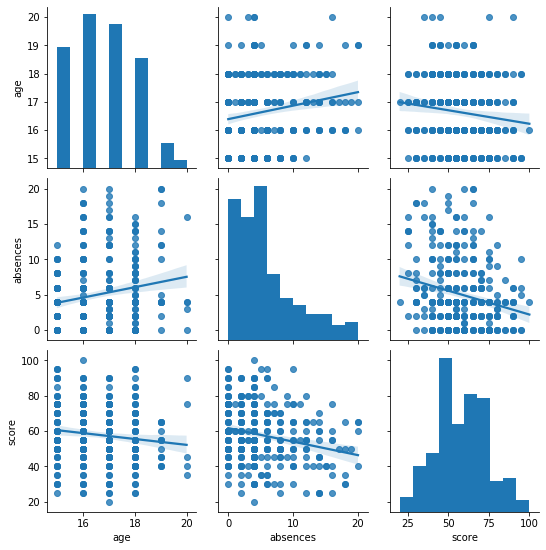

In [129]:
sns.pairplot(numeric_signs, kind = 'reg')

In [130]:
numeric_signs.corr()

,age,absences,score
age,1.000000,0.187749,-0.126294
absences,0.187749,1.000000,-0.227562
score,-0.126294,-0.227562,1.000000


Визуализация, полученная без учета строк с нулевым значением столбца 'score', проявила более четкую корреляцию между 'score' и 'absences': чем больше пропусков, тем ниже оценки за экзамен. 

Полученные результаты позволяю сделать вывод о том, что на 'score' влияют и значения столбца 'age', и значения столбца 'absences', исходя из этого, эти столбцы необходимо оставить при построении модели.

## 3.Анализ номинативных признаков.

In [131]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x = column, y ='score', data = student_details.loc[student_details.loc[:, column].isin(student_details.loc[:, column].value_counts().index[:])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

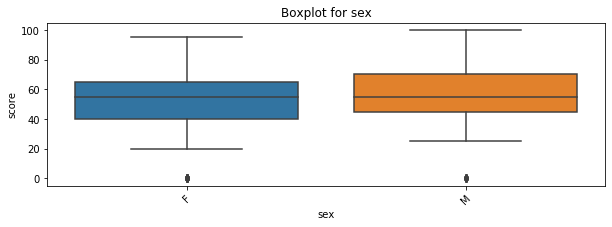

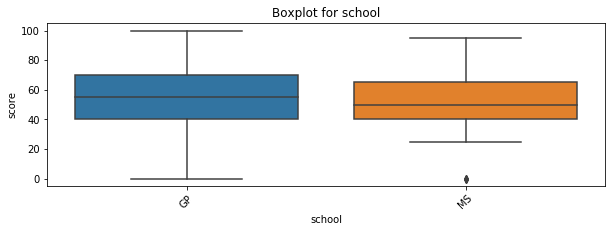

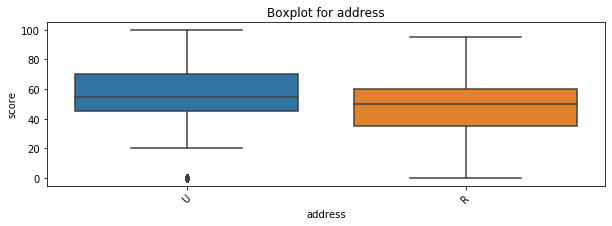

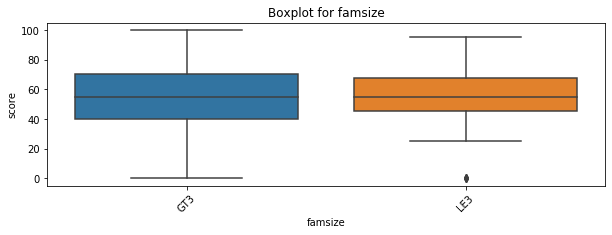

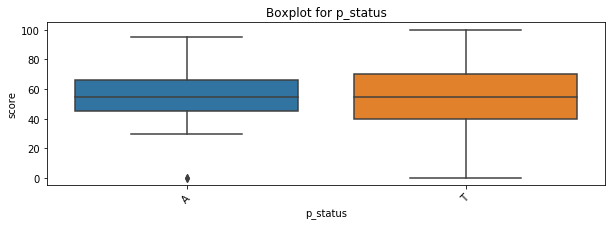

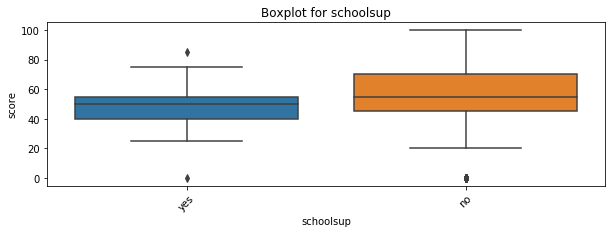

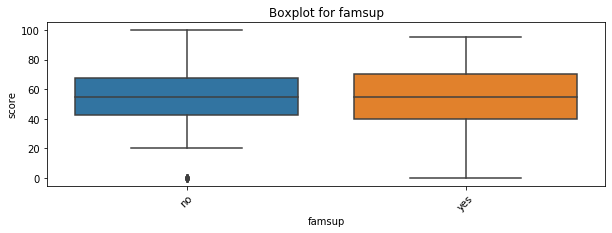

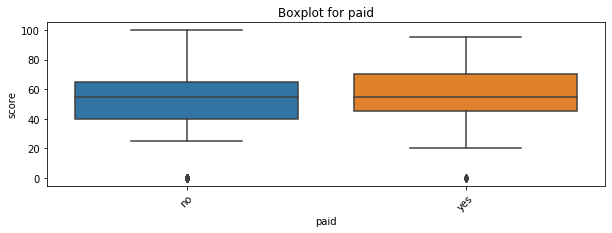

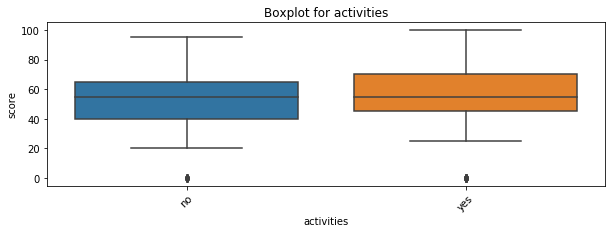

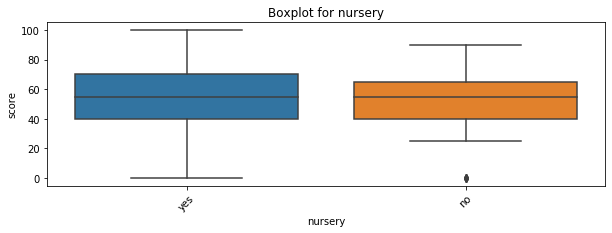

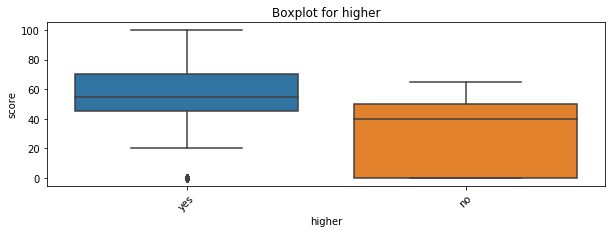

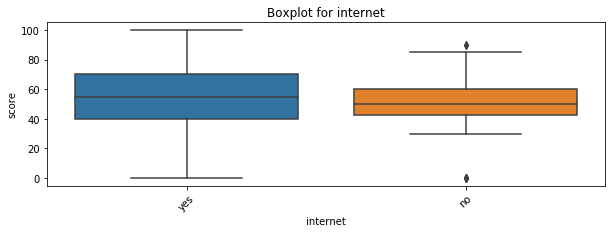

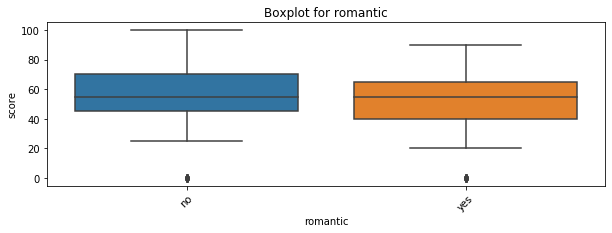

In [132]:
for col in binary_signs:
    get_boxplot(col)

In [133]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x = column, y = 'score', data = student_details.loc[student_details.loc[:, column].isin(student_details.loc[:, column].value_counts().index[:])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

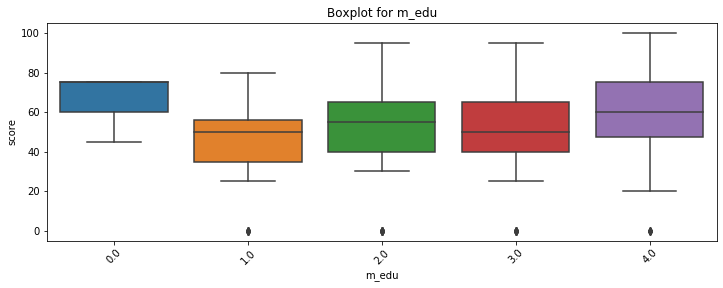

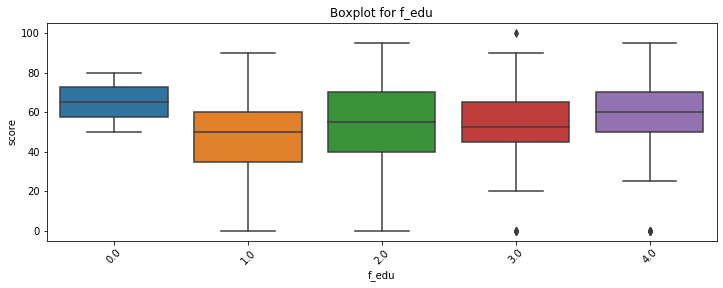

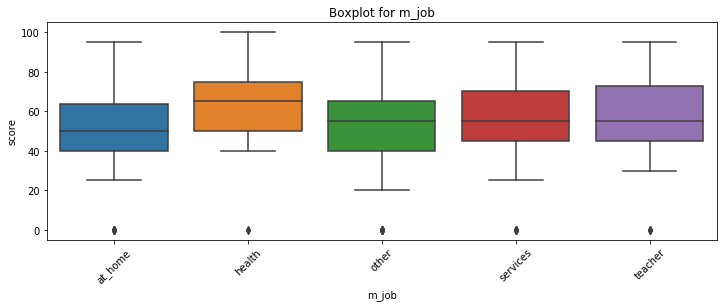

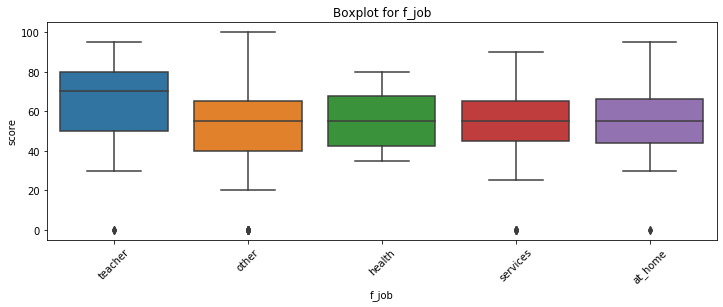

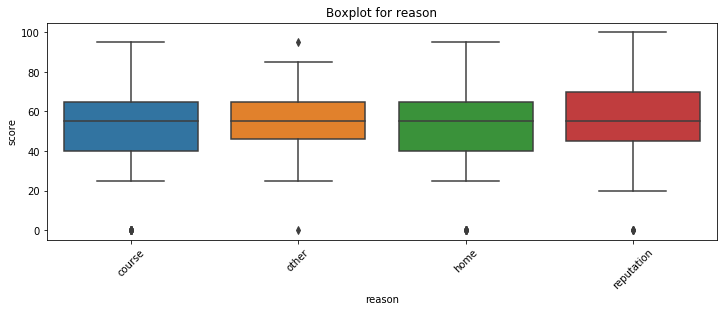

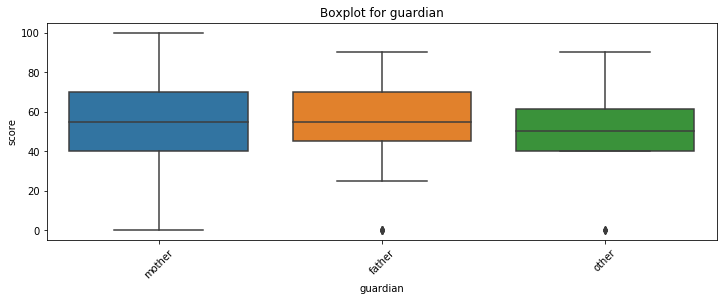

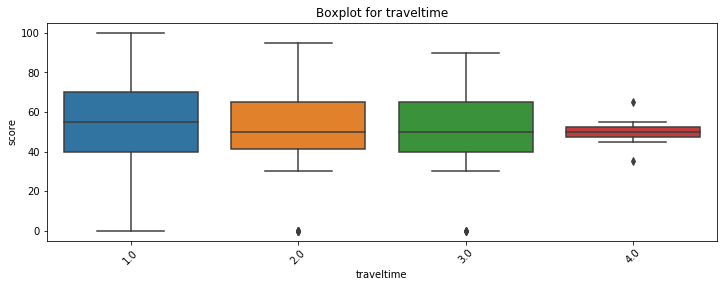

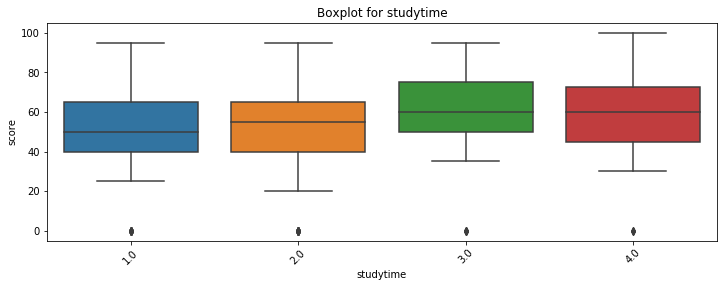

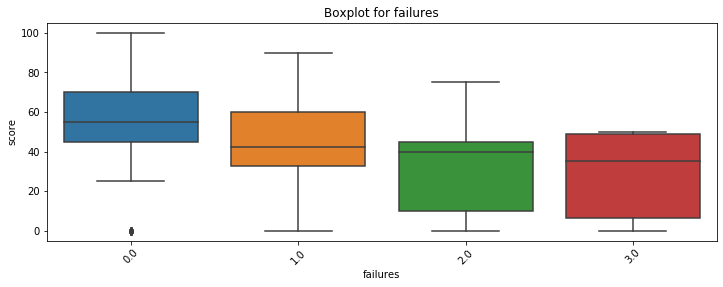

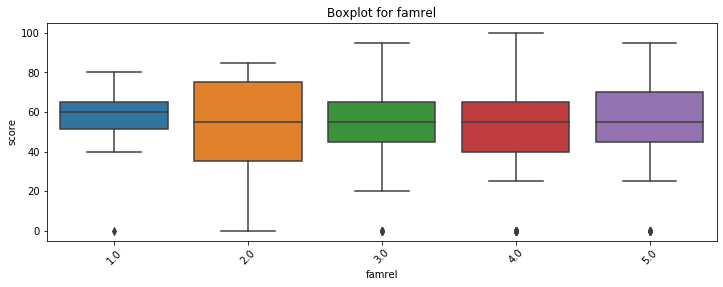

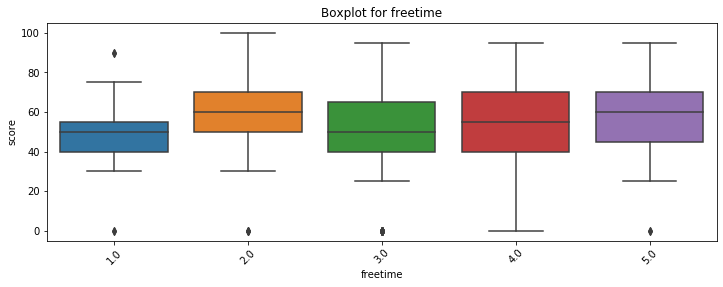

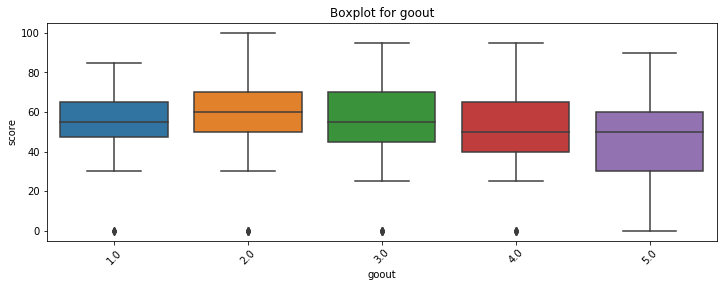

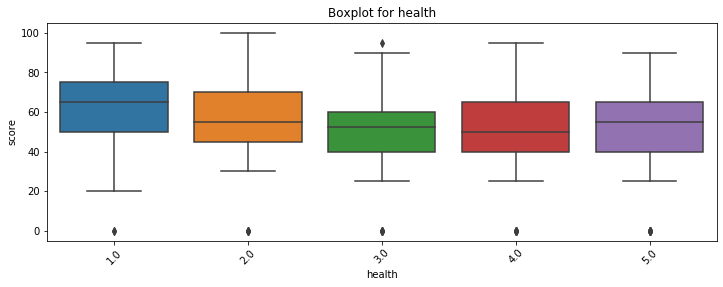

In [134]:
for col in categories_signs:
    get_boxplot(col)

Используем тест Стьюдента.

In [139]:
def get_stat_dif(column):
    columns = student_details.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(columns, 2))
    for comb in combinations_all:
        ttest = ttest_ind(student_details.loc[student_details.loc[:, column] == comb[0], 'score'].dropna(),
                          student_details.loc[student_details.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all): 
            print('!!!Найдены статистически значимые различия для столбца', column)
            break

In [140]:
list_of_all_columns = []
list_of_all_columns.extend(binary_signs)
list_of_all_columns.extend(categories_signs)
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для столбца address
!!!Найдены статистически значимые различия для столбца higher
!!!Найдены статистически значимые различия для столбца romantic
!!!Найдены статистически значимые различия для столбца m_edu
!!!Найдены статистически значимые различия для столбца m_job
!!!Найдены статистически значимые различия для столбца failures


### Вывод: 
значимо отличаются значения по 6 признакам: 'address', 'higher', 'romantic', 'm_edu', 'm_job', 'failures', значения этих признаком необходимо оставить для построения модели.

## Итоговыe выводы:
В результате проведенного анализа можно сделать следующие выводы:

- первоначально Датасет состоял из 30 столбцов и 395 строк;
- в первичных данных достаточное количество пропущенных значений (только 2 столбца не имели таковых);
- в рамках предварительного анализа имеющихся данных мы выявили и удалили выбросы, заполнили пропущенные значения, исправили ошибки;
- по результатам корреляционного анализа и анализа номинативных признаков для построения модели оставили следуюшие признаки: 'age', 'absences', 'address', 'higher', 'romantic', 'm_edu', 'm_job', 'failures'.


